In [609]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data**

In [610]:
# Load data
df = pd.read_csv('data/HR_data.csv')

In [611]:
# Inspect data
# How many participants do we have
print(f'There are {np.max(df['Individual'].unique())} different participants.')

# How many observations in total
# There will be 4 rounds x 3 phases recordings per participant 
print(f'\nThere are {len(df)} observations in total.\n')

# Participants only play once (in one cohort)
cohorts = df['Cohort'].unique()
cohorts.sort()

for cohort in cohorts:
    df_cohort = df.copy()
    df_cohort = df[df['Cohort'] == cohort]
    print(f"Participants in cohort {cohort}: {df_cohort['Individual'].unique().tolist()}")

There are 26 different participants.

There are 312 observations in total.

Participants in cohort D1_1: [7, 8, 9, 10, 11, 12, 13, 14]
Participants in cohort D1_2: [15, 16, 17, 18, 19, 20]
Participants in cohort D1_3: [21, 22, 23, 24]
Participants in cohort D1_4: [1, 2, 3, 4]
Participants in cohort D1_5: [25, 26]
Participants in cohort D1_6: [5, 6]


In [612]:
# Order the data frame so it is more clear to read
df_new = df.copy()
df_new = df_new.sort_values(by=['Cohort', 'Round', 'Phase'])
df_new.reset_index(drop=True, inplace=True)

# Define the columns to move to the front
cols_to_front = ['Unnamed: 0','Cohort', 'Round', 'Phase','Individual','Puzzler']

# Get all other columns, excluding the ones moved to the front
other_cols = [col for col in df_new.columns if col not in cols_to_front]

# Create the new column order
new_column_order = cols_to_front + other_cols

# Reindex the DataFrame with the new column order
df_new = df_new[new_column_order]

In [613]:
df_new.columns

Index(['Unnamed: 0', 'Cohort', 'Round', 'Phase', 'Individual', 'Puzzler',
       'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max',
       'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew', 'HR_TD_Slope_min',
       'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope', 'TEMP_TD_Mean',
       'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min', 'TEMP_TD_Max',
       'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew', 'TEMP_TD_Slope_min',
       'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean', 'TEMP_TD_Slope',
       'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Min',
       'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis', 'EDA_TD_P_Skew',
       'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean',
       'EDA_TD_P_Slope', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std',
       'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis',
       'EDA_TD_T_Skew', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max',
       'EDA_TD_T_Slope_mean', 'EDA_TD_T

In [614]:
nan_counts = df_new.isnull().sum()

# Display columns with NaN values and their counts
print("NaN values in each column:")
print(nan_counts[nan_counts > 0])


rows_with_nan = df_new[df_new.isnull().any(axis=1)]

# Display the rows with NaN values
print("Rows with NaN values:")
print(rows_with_nan.index)

NaN values in each column:
EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64
Rows with NaN values:
Index([28, 52, 68, 74, 206], dtype='int64')


In [615]:
# Identify columns with nan values
nan_counts = df_new.isnull().sum()
cols_with_nan = nan_counts[nan_counts > 0].index

# Identify rows with nan values
rows_with_nan_index = df_new[df_new.isnull().any(axis=1)].index

# See the specific rows and columns with nan values
print("Subset of DataFrame showing only rows and columns with missing values:")
df_new.loc[rows_with_nan_index, cols_with_nan]

Subset of DataFrame showing only rows and columns with missing values:


,EDA_TD_P_RT,EDA_TD_P_ReT,inspired,attentive,afraid,active,determined
28,2.108696,1.911765,NaN,3.0,4.0,2.0,2.0
52,3.387500,2.367647,NaN,3.0,1.0,2.0,3.0
68,1.968750,2.703125,2.0,2.0,1.0,2.0,NaN
74,2.321429,1.892857,2.0,NaN,NaN,NaN,NaN
206,NaN,NaN,2.0,3.0,1.0,3.0,3.0


In [616]:
# Input the EDA values first KNN
from sklearn.impute import KNNImputer

EDA_cols = ['EDA_TD_P_RT', 'EDA_TD_P_ReT']
knn_imputer = KNNImputer(n_neighbors=1)

# KNN
df_new[EDA_cols] = knn_imputer.fit_transform(df_new[EDA_cols])

print("Subset of DataFrame showing only rows and columns with missing values:")
# Re-check the specific rows/columns to see the imputed values
df_new.loc[rows_with_nan_index, cols_with_nan]

Subset of DataFrame showing only rows and columns with missing values:


,EDA_TD_P_RT,EDA_TD_P_ReT,inspired,attentive,afraid,active,determined
28,2.108696,1.911765,NaN,3.0,4.0,2.0,2.0
52,3.387500,2.367647,NaN,3.0,1.0,2.0,3.0
68,1.968750,2.703125,2.0,2.0,1.0,2.0,NaN
74,2.321429,1.892857,2.0,NaN,NaN,NaN,NaN
206,1.998292,2.013928,2.0,3.0,1.0,3.0,3.0


In [617]:
# Input the emotion values KNN

emotion_cols = ['inspired', 'attentive', 'afraid', 'active', 'determined']
knn_imputer = KNNImputer(n_neighbors=5)

# KNN and round
imputed_values = knn_imputer.fit_transform(df_new[emotion_cols])
df_new[emotion_cols] = np.round(imputed_values)

print("Subset of DataFrame showing only rows and columns with missing values:")
# Re-check the specific rows/columns to see the imputed values
df_new.loc[rows_with_nan_index, cols_with_nan]

Subset of DataFrame showing only rows and columns with missing values:


,EDA_TD_P_RT,EDA_TD_P_ReT,inspired,attentive,afraid,active,determined
28,2.108696,1.911765,2.0,3.0,4.0,2.0,2.0
52,3.387500,2.367647,1.0,3.0,1.0,2.0,3.0
68,1.968750,2.703125,2.0,2.0,1.0,2.0,2.0
74,2.321429,1.892857,2.0,2.0,1.0,2.0,3.0
206,1.998292,2.013928,2.0,3.0,1.0,3.0,3.0


# **PCA**

## **Preprocessing**

In [618]:
# Drop the initial index, so we keep all the features
df_new.drop('Unnamed: 0', axis=1, inplace=True)

In [619]:
# Let's check the categorical columns
categorical_columns = df_new.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['Cohort', 'Round', 'Phase']

In [620]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
len(df_new.columns.to_list())

67

In [621]:
# Let's check the categorical columns
categorical_columns = df_new.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

# One Hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')
encoded_data = encoder.fit_transform(df_new[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Combine with the original DataFrame (excluding the encoded columns)
df_encoded = pd.concat([df_new.drop(categorical_columns, axis=1), encoded_df], axis=1)
df_encoded.columns
len(df_encoded.columns.to_list())

Categorical columns: ['Cohort', 'Round', 'Phase']


77

## **Scaling**

In [622]:
scaler = StandardScaler()
scaler.fit(df_encoded)
scaled_df_encoded = pd.DataFrame(scaler.transform(df_encoded),columns= df_encoded.columns )

## **PCA**

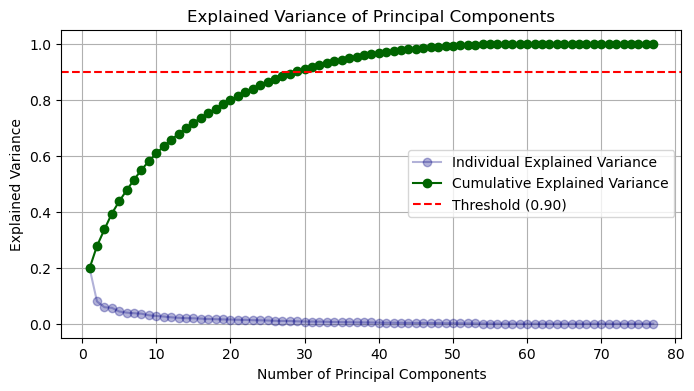

In [623]:
from sklearn.decomposition import PCA
# Applying PCA
pca = PCA()
df_pca = pca.fit_transform(scaled_df_encoded)
# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Plot individual and cumulative explained variance
fig = plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='navy', alpha=0.3, label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='darkgreen', label='Cumulative Explained Variance')

plt.axhline(y=0.90, color='red', linestyle='--', label='Threshold (0.90)')


plt.xlabel('Number of Principal Components')
# plt.xlim([1,14])
# plt.xticks(np.arange(1,15))
plt.ylabel('Explained Variance')
plt.grid()
plt.title('Explained Variance of Principal Components')
plt.legend()

In [624]:
# Get the loadings (components)
loadings = pca.components_

# Create a DataFrame for easier interpretation
# Use the column names from the data used for PCA
feature_names = scaled_df_encoded.columns
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=feature_names)

# Get loadings for PC1 sorted by absolute value
pc1_loadings = loadings_df['PC1'].abs().sort_values(ascending=False)
print("Top features contributing to PC1 (absolute loadings):")
print(pc1_loadings.head(10)) # Display top 10 features

print("\n" + "="*30 + "\n") # Separator

# Get loadings for PC2 sorted by absolute value
pc2_loadings = loadings_df['PC2'].abs().sort_values(ascending=False)
print("Top features contributing to PC2 (absolute loadings):")
print(pc2_loadings.head(10)) # Display top 10 features

# You can also view the actual loadings (positive/negative) for the top features
print("\nActual loadings for top PC1 features:")
print(loadings_df.loc[pc1_loadings.head(10).index, 'PC1'])

print("\nActual loadings for top PC2 features:")
print(loadings_df.loc[pc2_loadings.head(10).index, 'PC2'])


Top features contributing to PC1 (absolute loadings):
EDA_TD_P_Max          0.238853
EDA_TD_P_std          0.235603
EDA_TD_T_std          0.231332
EDA_TD_T_Slope_max    0.230410
EDA_TD_P_Slope_max    0.228741
EDA_TD_P_Slope_min    0.224709
EDA_TD_T_Slope_min    0.223371
EDA_TD_P_AUC          0.212723
EDA_TD_P_Mean         0.211881
EDA_TD_T_Max          0.210040
Name: PC1, dtype: float64


Top features contributing to PC2 (absolute loadings):
active            0.258473
Phase_phase2      0.227581
EDA_TD_P_Peaks    0.226680
HR_TD_Mean        0.218403
HR_TD_AUC         0.214206
alert             0.212554
attentive         0.205864
HR_TD_Max         0.204189
HR_TD_Median      0.201839
determined        0.201079
Name: PC2, dtype: float64

Actual loadings for top PC1 features:
EDA_TD_P_Max          0.238853
EDA_TD_P_std          0.235603
EDA_TD_T_std          0.231332
EDA_TD_T_Slope_max    0.230410
EDA_TD_P_Slope_max    0.228741
EDA_TD_P_Slope_min   -0.224709
EDA_TD_T_Slope_min   -0.223371
ED

In [625]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC68,PC69,PC70,PC71,PC72,PC73,PC74,PC75,PC76,PC77
Individual,0.059464,0.037196,0.048364,-0.063514,-0.156177,-0.008205,0.364986,-0.001150,0.292768,-0.008556,...,0.011602,0.019831,-0.011844,-0.000171,0.000502,0.000654,-0.000589,0.000000e+00,-0.000000e+00,0.000000e+00
Puzzler,0.014490,0.020653,0.021465,0.059935,-0.004861,0.084835,0.032040,-0.189148,-0.087311,0.036051,...,0.002708,-0.004119,-0.002391,0.000808,-0.000908,0.000510,-0.000371,-6.872988e-17,-1.137996e-16,-9.181280e-17
HR_TD_Mean,-0.004257,0.218403,0.198168,0.271407,-0.192190,0.095972,0.044662,-0.027267,-0.012547,-0.036178,...,0.688226,-0.026952,-0.043705,0.065983,0.028765,0.008202,-0.009729,2.101605e-15,1.131382e-15,1.261701e-16
HR_TD_Median,0.000302,0.201839,0.174057,0.254457,-0.215059,0.140010,0.016798,-0.066733,0.001046,-0.025141,...,-0.204826,0.015578,0.018304,-0.036442,-0.009998,0.000254,0.000515,3.674061e-15,-4.113395e-16,-1.260123e-16
HR_TD_std,-0.024941,0.144678,0.201758,0.129306,0.099179,-0.209591,0.172585,0.146842,-0.081914,0.000468,...,-0.072120,0.014472,0.033783,-0.020562,-0.005514,-0.003880,0.000174,-1.480594e-15,-3.751103e-16,3.016108e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Round_round_3,-0.021151,-0.011774,0.053596,-0.038317,-0.082277,0.021296,-0.095356,0.103119,0.037088,-0.048205,...,-0.002849,-0.001638,-0.002251,0.000405,0.000604,0.000070,0.000015,2.201150e-01,4.477942e-01,3.209012e-02
Round_round_4,-0.002813,-0.031042,-0.021291,-0.100136,-0.029151,-0.004269,0.046660,0.088487,-0.128979,0.041125,...,-0.002701,0.002781,0.003034,0.000623,0.000939,0.000509,0.000616,2.201150e-01,4.477942e-01,3.209012e-02
Phase_phase1,-0.021668,-0.092836,0.120294,0.050045,-0.020125,-0.113265,-0.045786,-0.108317,0.051883,0.163407,...,-0.001621,0.001635,-0.000741,0.000533,0.000830,-0.000255,0.000645,2.569721e-01,-1.615116e-01,4.911341e-01
Phase_phase2,0.020002,0.227581,-0.192408,-0.025549,0.064477,0.128294,0.008266,0.139702,0.076656,-0.010733,...,0.004092,-0.001619,-0.001687,0.000653,-0.000273,0.000400,-0.000778,2.569721e-01,-1.615116e-01,4.911341e-01


In [626]:
df_encoded.columns

Index(['Individual', 'Puzzler', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std',
       'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 

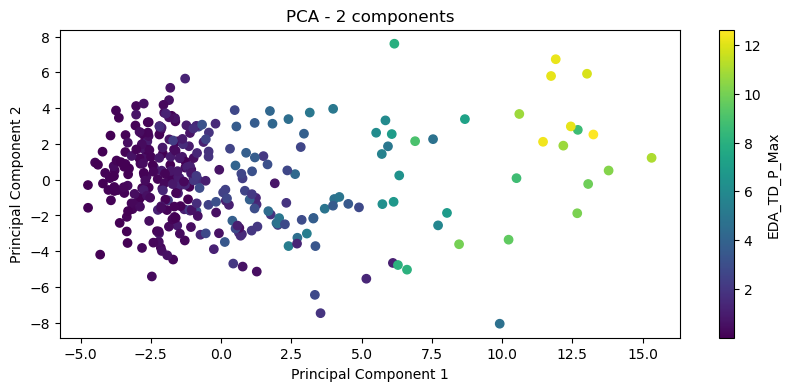

In [627]:
pc1 = df_pca[:, 0]
pc2 = df_pca[:, 1]

fig = plt.figure(figsize=(10, 4))
scatter = plt.scatter(pc1, pc2, c=df_encoded['EDA_TD_P_Max'], cmap='viridis', alpha=1)
plt.colorbar(scatter, label='EDA_TD_P_Max')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 components')
plt.show()

# **Clustering**

In [628]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
# from sklearn.cluster import clusterplot

In [629]:
cluster_labels = fcluster(Z, t=3, criterion='maxclust')
true_phases = df_new['Phase'].str[-1].astype('int')
true_phases

0      1
1      1
2      1
3      1
4      1
      ..
307    1
308    2
309    2
310    3
311    3
Name: Phase, Length: 312, dtype: int32

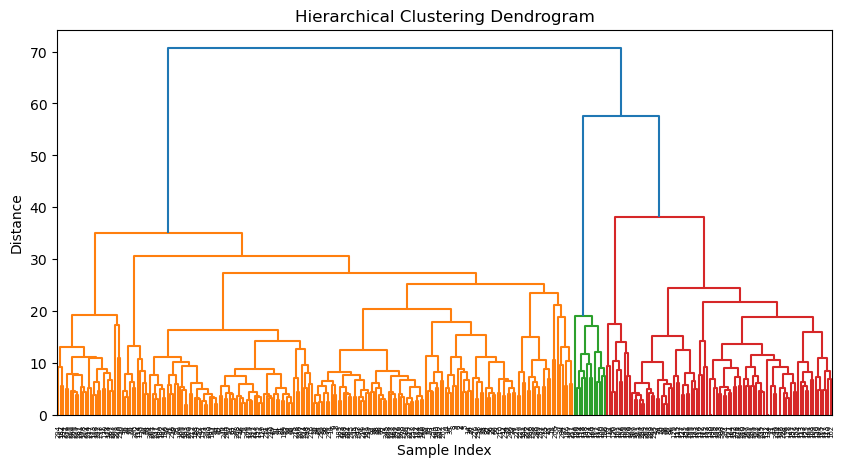

Normalized Mutual Information (NMI): 0.006


In [630]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

columns_desired = ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std',
       'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_ReT']
data_clustering = scaled_df_encoded[columns_desired]

Z = linkage(data_clustering, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

from sklearn.metrics import normalized_mutual_info_score

cluster_labels = fcluster(Z, t=2, criterion='maxclust')
true_labels = df_new['Phase'].str[-1].astype('int')

nmi = normalized_mutual_info_score(true_labels, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.3f}")

In [632]:
true_labels

0      1
1      1
2      1
3      1
4      1
      ..
307    1
308    2
309    2
310    3
311    3
Name: Phase, Length: 312, dtype: int32